INTRODUCTION



In [1]:
#All initial things should be done here

%matplotlib inline 

import matplotlib as plt
import pandas as pd
#import statistics 

pd.set_option('display.max_columns', None)



***
In data I use, there are 3 teams having the same dataset structure for 7 years. And each of them needs to be cleaned 
to be ready for the further analysis. Therefore, I created some functions which are used for all the datasets. 
***

In [2]:
#All needed functions defined here



#used to call other functions and return a clean dataframe having clean and needed data inside. 
def main_clean_func (df_, flag):
    
    df_ = tweak_columns (df_, flag)
    df_ = tweak_data (df_, flag)  
    
    return df_
    
  
    
#Cleaning the columns
def tweak_columns (df_, flag):
    
    if flag == 'P':
        df_= df_.rename(columns={'Pos': 'Position', 'MP': 'Matches_Played', 'Min':'Mins_Played',
                             'Gls':'Goals', 'Ast':'Assists'})
        df_ = df_[['Player', 'Nation','Season', 'Position', 'Age', 'Matches_Played','Mins_Played', 'Goals', 'Assists', 
                   'CrdY', 'CrdR' ]]
    else : 
        df_= df_.rename(columns={'Rk': 'Ranking', 'MP': 'Matches_Played',
                             'W':'Wins', 'D':'Draws', 'L':'Loses', 'Top Team Scorer': 'Top_Scorer'})
        
        df_ = df_[['Ranking', 'Squad', 'Season', 'Matches_Played', 'Wins', 'Draws', 'Loses', 'Top_Scorer']]   
        
    return df_



#Cleaning the squad data and make it useful for the further steps. 
def tweak_data(df_, flag):
    
    if flag == 'P': 
        df_ = (df_
            .assign(Player = df_.Player.str.split("\\").map(lambda x: x[0]).str.strip(),
                    Nation=df_.Nation.str.split(" ").map(lambda y: y[1]) )
           )  
       
    else : #Sergio Agüero - 21	
                
        df_ = (df_
            .assign(Top_Scorer = df_.Top_Scorer.str.split("-").map(lambda x: x[0]).str.strip(),
                    Top_Scorer_Score = df_.Top_Scorer.str.split("-").map(lambda x: x[1])
                )
              )
        #df_ = df_.set_index('Squad')
        
        #squads = ['Liverpool', 'Manchester City', 'Manchester Utd']
                    
        #df_ = df_.loc[[x for x in squads],:]
    
    
    #dropping NaN records..
    df_ =  df_.dropna()   
    return df_
        

***

Now, fetching data for Manchester United only for 2018-2019.. 

As it is shown in the output below, I need to do some cleaning to make it ready for the data analysis. 

Some issues are listed above:

- Player names are written double and delimited by '\'
- Nation names are written double
- Not all column names are understandable. 
- No need to have all the columns in place.

***


In [3]:
df_sq_mu_20192020= pd.read_csv('data/manchesterunited_20192020.csv')


df_sq_mu_20192020.head()


,Player,Nation,Pos,Age,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK,G+A-PK,xG,npxG,xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA,Matches
0,David de Gea\David-de-Gea,es ESP,GK,28,38,38,3420.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches
1,Harry Maguire\Harry-Maguire,eng ENG,DF,26,38,38,3420.0,1.0,1.0,0.0,0.0,6.0,0.0,0.03,0.03,0.05,0.03,0.05,2.0,2.0,0.6,0.05,0.01,0.07,0.05,0.07,Matches
2,Victor Lindelöf\Victor-Lindelof,se SWE,DF,25,35,35,3092.0,1.0,0.0,0.0,0.0,6.0,0.0,0.03,0.00,0.03,0.03,0.03,0.4,0.4,0.3,0.01,0.01,0.02,0.01,0.02,Matches
3,Aaron Wan-Bissaka\Aaron-Wan-Bissaka,eng ENG,DF,21,35,34,3070.0,0.0,4.0,0.0,0.0,8.0,0.0,0.00,0.12,0.12,0.00,0.12,0.9,0.9,2.9,0.03,0.08,0.11,0.03,0.11,Matches
4,Marcus Rashford\Marcus-Rashford,eng ENG,FW,21,31,31,2643.0,17.0,7.0,6.0,8.0,3.0,0.0,0.58,0.24,0.82,0.37,0.61,17.3,11.2,4.6,0.59,0.16,0.74,0.38,0.54,Matches


In [4]:
df_stats_20192020 = pd.read_csv('data/20192020_Stats.csv')

df_stats_20192020.head()

,Rk,Squad,MP,W,D,L,GF,GA,GDiff,Pts,xG,xGA,xGDiff,xGDiff/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,38,32,3,3,85,33,52,99,71.5,40.0,31.5,0.83,41955,Mohamed Salah - 19,Alisson,→ UEFA Champions League via league finish
1,2,Manchester City,38,26,3,9,102,35,67,81,93.0,34.7,58.3,1.53,37097,Raheem Sterling - 20,Ederson,→ UEFA Champions League via league finish
2,3,Manchester Utd,38,18,12,8,66,36,30,66,59.4,37.4,22.0,0.58,57415,Marcus Rashford Anthony Martial - 17,David de Gea,→ UEFA Champions League via league finish
3,4,Chelsea,38,20,6,12,69,54,15,66,66.6,37.9,28.6,0.75,32023,Tammy Abraham - 15,Kepa Arrizabalaga,→ UEFA Champions League via league finish
4,5,Leicester City,38,18,8,12,67,41,26,62,61.6,44.5,17.1,0.45,25312,Jamie Vardy - 23,Kasper Schmeichel,→ UEFA Europa League via league finish


***

As such, in the coming cells, I call the functions that I have written above to tweak the table and the data inside...

***


In [5]:
df_stats__20192020 = pd.read_csv('data/20192020_Stats.csv')
df_stats__20192020['Season'] = '2019-2020'

df_stats__20182019 = pd.read_csv('data/20182019_Stats.csv')
df_stats__20182019['Season'] = '2018-2019'

df_stats__20172018 = pd.read_csv('data/20172018_Stats.csv')
df_stats__20172018['Season'] = '2017-2018'

df_stats__20162017 = pd.read_csv('data/20162017_Stats.csv')
df_stats__20162017['Season'] = '2016-2017'

df_stats__20152016 = pd.read_csv('data/20152016_Stats.csv')
df_stats__20152016['Season'] = '2015-2016'

df_stats__20142015 = pd.read_csv('data/20142015_Stats.csv')
df_stats__20142015['Season'] = '2014-2015'

df_stats__20132014 = pd.read_csv('data/20132014_Stats.csv')
df_stats__20132014['Season'] = '2013-2014'

df_stats__20122013 = pd.read_csv('data/20122013_Stats.csv')
df_stats__20122013['Season'] = '2012-2013'

df_stats__20112012 = pd.read_csv('data/20112012_Stats.csv')
df_stats__20112012['Season'] = '2011-2012'

df_stats__20102011 = pd.read_csv('data/20102011_Stats.csv')
df_stats__20102011['Season'] = '2010-2011'


#creating a list so I will clean all the data in one single for loop easily..
df_list_all_stats = [df_stats__20102011,df_stats__20112012, df_stats__20122013, 
                     df_stats__20132014,df_stats__20142015, df_stats__20152016,
                     df_stats__20162017, df_stats__20172018, df_stats__20182019,
                     df_stats__20192020]


#I will filter all datasets for 3 teams in this list..
squads = [ 'Manchester Utd']

#'Liverpool', 'Manchester City',

#Now, time to tweak the data for all the datasets I have read above..
for i in range(len(df_list_all_stats)):    
    
    df_list_all_stats[i] = main_clean_func(df_list_all_stats[i] ,'T')
    
    df_list_all_stats[i] = (df_list_all_stats[i]
                            .loc[df_list_all_stats[i].Squad.isin(squads)])

    
#As a final step, concatenating all the dataframes in the list to create one single dataframe..     
df_team_stat_seasons = pd.concat(df_list_all_stats)

***
Let me check how the dataframes for the squads in my list now look like
***

In [6]:
df_team_stat_seasons

,Ranking,Squad,Season,Matches_Played,Wins,Draws,Loses,Top_Scorer,Top_Scorer_Score
0,1,Manchester Utd,2010-2011,38,23,11,4,Dimitar Berbatov,20
1,2,Manchester Utd,2011-2012,38,28,5,5,Wayne Rooney,27
0,1,Manchester Utd,2012-2013,38,28,5,5,Robin van Persie,26
6,7,Manchester Utd,2013-2014,38,19,7,12,Wayne Rooney,17
3,4,Manchester Utd,2014-2015,38,20,10,8,Wayne Rooney,12
4,5,Manchester Utd,2015-2016,38,19,9,10,Anthony Martial,11
5,6,Manchester Utd,2016-2017,38,18,15,5,Zlatan Ibrahimović,17
1,2,Manchester Utd,2017-2018,38,25,6,7,Romelu Lukaku,16
5,6,Manchester Utd,2018-2019,38,19,9,10,Paul Pogba,13
2,3,Manchester Utd,2019-2020,38,18,12,8,Marcus Rashford Anthony Martial,17


***

I will do the same for the files having the nationalities of the players..

***

In [7]:
df_sq_mu__20192020 = pd.read_csv('data/manchesterunited_20192020.csv')
df_sq_mu__20192020['Season'] = '2019-2020'

df_sq_mu__20182019 = pd.read_csv('data/manchesterunited_20182019.csv')
df_sq_mu__20182019['Season'] = '2018-2019'

df_sq_mu__20172018 = pd.read_csv('data/manchesterunited_20172018.csv')
df_sq_mu__20172018['Season'] = '2017-2018'

df_sq_mu__20162017 = pd.read_csv('data/manchesterunited_20162017.csv')
df_sq_mu__20162017['Season'] = '2016-2017'

df_sq_mu__20152016 = pd.read_csv('data/manchesterunited_20152016.csv')
df_sq_mu__20152016['Season'] = '2015-2016'

df_sq_mu__20142015 = pd.read_csv('data/manchesterunited_20142015.csv')
df_sq_mu__20142015['Season'] = '2014-2015'

df_sq_mu__20132014 = pd.read_csv('data/manchesterunited_20132014.csv')
df_sq_mu__20132014['Season'] = '2013-2014'

df_sq_mu__20122013 = pd.read_csv('data/manchesterunited_20122013.csv')
df_sq_mu__20122013['Season'] = '2012-2013'

df_sq_mu__20112012 = pd.read_csv('data/manchesterunited_20112012.csv')
df_sq_mu__20112012['Season'] = '2011-2012'

df_sq_mu__20102011 = pd.read_csv('data/manchesterunited_20102011.csv')
df_sq_mu__20102011['Season'] = '2010-2011'


#creating a list so I will clean all the data in one single for loop easily..
df_list_all_squads = [df_sq_mu__20102011, df_sq_mu__20112012,df_sq_mu__20122013, 
                     df_sq_mu__20132014,df_sq_mu__20142015, df_sq_mu__20152016,
                     df_sq_mu__20162017, df_sq_mu__20172018, df_sq_mu__20182019,
                     df_sq_mu__20192020]


#Now, time to tweak the data for all the datasets I have read above..
for i in range(len(df_list_all_squads)):    
    
    df_list_all_squads[i] = main_clean_func(df_list_all_squads[i] ,'P')
    

#As a final step, concatenating all the dataframes in the list to create one single dataframe..     
df_players = pd.concat(df_list_all_squads)


***

Let me check how new dataframe looks like...

***

In [8]:
df_players.head()

,Player,Nation,Season,Position,Age,Matches_Played,Mins_Played,Goals,Assists,CrdY,CrdR
0,Nemanja Vidić,SRB,2010-2011,DF,28,35,3116.0,5.0,1.0,7.0,1.0
1,Patrice Evra,FRA,2010-2011,DF,29,35,2957.0,1.0,0.0,1.0,0.0
2,Edwin van der Sar,NED,2010-2011,GK,39,33,2970.0,0.0,0.0,1.0,0.0
3,Nani,POR,2010-2011,FWMF,23,33,2659.0,9.0,14.0,1.0,0.0
4,Wayne Rooney,ENG,2010-2011,FWMF,24,28,2225.0,11.0,11.0,5.0,0.0


***

What I will do now is that I will calculate the percentage of the foreign players in the team per season and assign this info to the "df_team_stat_seasons" as a new column..

First of all, I will calculate the number of the foreign players and total number of the players per season..


***

In [9]:
df_players_w_percentage= df_players[~(df_players.Nation=='ENG')].groupby(['Season']).count()

df_players_w_percentage ['Total_Num_Players'] = df_players.groupby('Season').count()['Player']

df_players_w_percentage = df_players_w_percentage[[ 'Player', 'Total_Num_Players']]


df_players_w_percentage

,Player,Total_Num_Players
Season,,
2010-2011,20,29
2011-2012,18,31
2012-2013,15,25
2013-2014,21,30
2014-2015,20,33
2015-2016,20,33
2016-2017,19,31
2017-2018,19,27
2018-2019,19,28


***

I will change the column name from nation to 'Number of Foreign players' and select only the columns relevant to me..

***


In [10]:
df_players_w_percentage = df_players_w_percentage.rename(columns={'Player': 'Num_Foreign_Players'})

df_players_w_percentage = df_players_w_percentage[[ 'Num_Foreign_Players', 'Total_Num_Players']]


df_players_w_percentage

,Num_Foreign_Players,Total_Num_Players
Season,,
2010-2011,20,29
2011-2012,18,31
2012-2013,15,25
2013-2014,21,30
2014-2015,20,33
2015-2016,20,33
2016-2017,19,31
2017-2018,19,27
2018-2019,19,28


***

Let me find out the percentage and add it to the dataframe...


***

In [11]:
df_players_w_percentage ['Percentage_of_Foreign_Players'] = round(
                                                                  ((df_players_w_percentage
                                                                    .Num_Foreign_Players*100)/df_players_w_percentage
                                                                                             .Total_Num_Players), 2)
df_players_w_percentage

,Num_Foreign_Players,Total_Num_Players,Percentage_of_Foreign_Players
Season,,,
2010-2011,20,29,68.97
2011-2012,18,31,58.06
2012-2013,15,25,60.00
2013-2014,21,30,70.00
2014-2015,20,33,60.61
2015-2016,20,33,60.61
2016-2017,19,31,61.29
2017-2018,19,27,70.37
2018-2019,19,28,67.86


***

I will add team score to the same table...

***

In [12]:
df_players_w_percentage = pd.merge(df_players_w_percentage, df_team_stat_seasons, on=['Season', 'Season'])







In [13]:
df_players_w_percentage = df_players_w_percentage [['Season', 'Num_Foreign_Players'
                                                    , 'Total_Num_Players', 'Percentage_of_Foreign_Players'
                                                   , 'Wins']]

df_players_w_percentage

,Season,Num_Foreign_Players,Total_Num_Players,Percentage_of_Foreign_Players,Wins
0,2010-2011,20,29,68.97,23
1,2011-2012,18,31,58.06,28
2,2012-2013,15,25,60.00,28
3,2013-2014,21,30,70.00,19
4,2014-2015,20,33,60.61,20
5,2015-2016,20,33,60.61,19
6,2016-2017,19,31,61.29,18
7,2017-2018,19,27,70.37,25
8,2018-2019,19,28,67.86,19
9,2019-2020,17,29,58.62,18


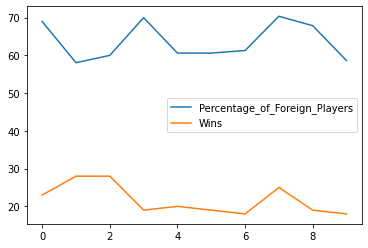

In [14]:
df_players_w_percentage[['Percentage_of_Foreign_Players','Wins']].plot()

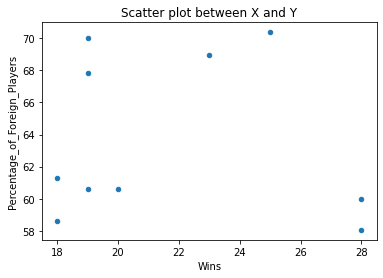

In [15]:
df_players_w_percentage.plot.scatter(y='Percentage_of_Foreign_Players', x='Wins'
                                     , title= "Scatter plot between X and Y");



*** 

All 2 graphs above does not tell us anything clearly. Let me calculate the correlation between these 2 variables: 

***

In [16]:
df_players_w_percentage.Percentage_of_Foreign_Players.corr(df_players_w_percentage.Wins)

-0.093838775262962

***

It is now obvious that there is a very weak negative correlation, even so close to 0, between the percentage of the foreign players in Manchester Utd and the number of the points they have scored..  In other words, there is no any obvious correlation statistically observed for this step..

***



***

Let's check it further by finding out the  between the number of the assists that the foreign players hold and the number of the points that the team scored..

I will first check if the total number of the goals achieved by both English players and others..

***

In [62]:
df_players

df_player_goals_by_nation = df_players.groupby(['Season', 'Nation']).Goals.sum().to_frame()

df_player_goals_by_nation.head()

Goals
Season    Nation       
2010-2011 BRA       2.0
          BUL      20.0
          ECU       1.0
          ENG      14.0
          FRA       1.0

In [63]:
my_list = ['ENG', 'BRA']


print(df_player_goals_by_nation[df_player_goals_by_nation.index.isin(my_list, level=1)])


#df_player_goals_by_nation.filter(like = 'ENG', axis=0).sum() #237


                  Goals
Season    Nation       
2010-2011 BRA       2.0
          ENG      14.0
2011-2012 BRA       2.0
          ENG      50.0
2012-2013 BRA       4.0
          ENG      19.0
2013-2014 BRA       0.0
          ENG      34.0
2014-2015 BRA       0.0
          ENG      20.0
2015-2016 BRA       0.0
          ENG      18.0
2016-2017 ENG      13.0
2017-2018 ENG      21.0
2018-2019 BRA       2.0
          ENG      18.0
2019-2020 BRA       1.0
          ENG      30.0


In [18]:
#df_mu_1819_foreign = df_mu_1819[~(df_mu_1819['Nation']=='ENG')]
#df_sum = df_mu_1819_foreign.groupby('Nation').sum()['Goals']
#df_sum.mean()   --3.35

df_mu_1819_nonfor = df_mu_1819[(df_mu_1819['Nation']=='ENG')]

df_mu_1819_nonfor

df_mu_1819_nonfor.Goals.mean()   --3.35




#df_mu_1819.Goals.mean()
#df_mu_1819.Goals.std()



#df_mu_1819_foreign = df_mu_1819[~(df_mu_1819['Nation']=='ENG')]
#df_sum = df_mu_1819_foreign.groupby('Nation').sum()['Goals']
#df_sum.plot()
#df_mu_1819.stat.mean
#df_mu_1819.Goals.corr(df_mu_1819.Assists)
#df_mu_1819.Matches_Played.corr(df_mu_1819.Goals)
#df_mu_1819.Mins_Played.corr(df_mu_1819.Goals)
#df_mu_1819.count()['Player']
#df_mu_1819[df_mu_1819.Nation=='ENG']

NameError: name 'df_mu_1819' is not defined